In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sn
import cv2
import tensorflow as tf
from tqdm import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [15]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

print(class_names_label)
IMAGE_SIZE=(150,150)






{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [16]:

def load_data():
    
    datasets = [r"D:\Internship_project\Day_7 TASK\seg_test", r"D:\Internship_project\Day_7 TASK\seg_train"]
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')   
        
        output.append((images, labels))

    return output




In [17]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading D:\Internship_project\Day_7 TASK\seg_test


100%|████████████████████████████████████████████████████████████████████████████████| 501/501 [00:05<00:00, 90.70it/s]


Loading D:\Internship_project\Day_7 TASK\seg_train


100%|█████████████████████████████████████████████████████████████████████████████| 2382/2382 [00:18<00:00, 128.35it/s]


In [18]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [20]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 3000
Number of testing examples: 14034
Each image is of size: (150, 150)


In [21]:
def display_random_image(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


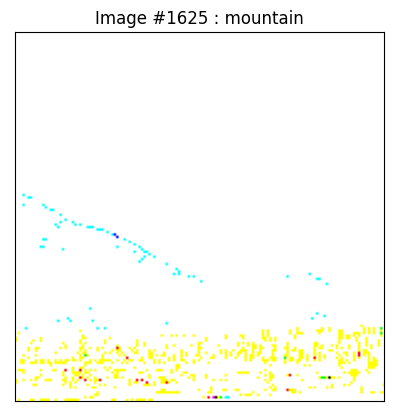

In [22]:
display_random_image(class_names, train_images, train_labels)

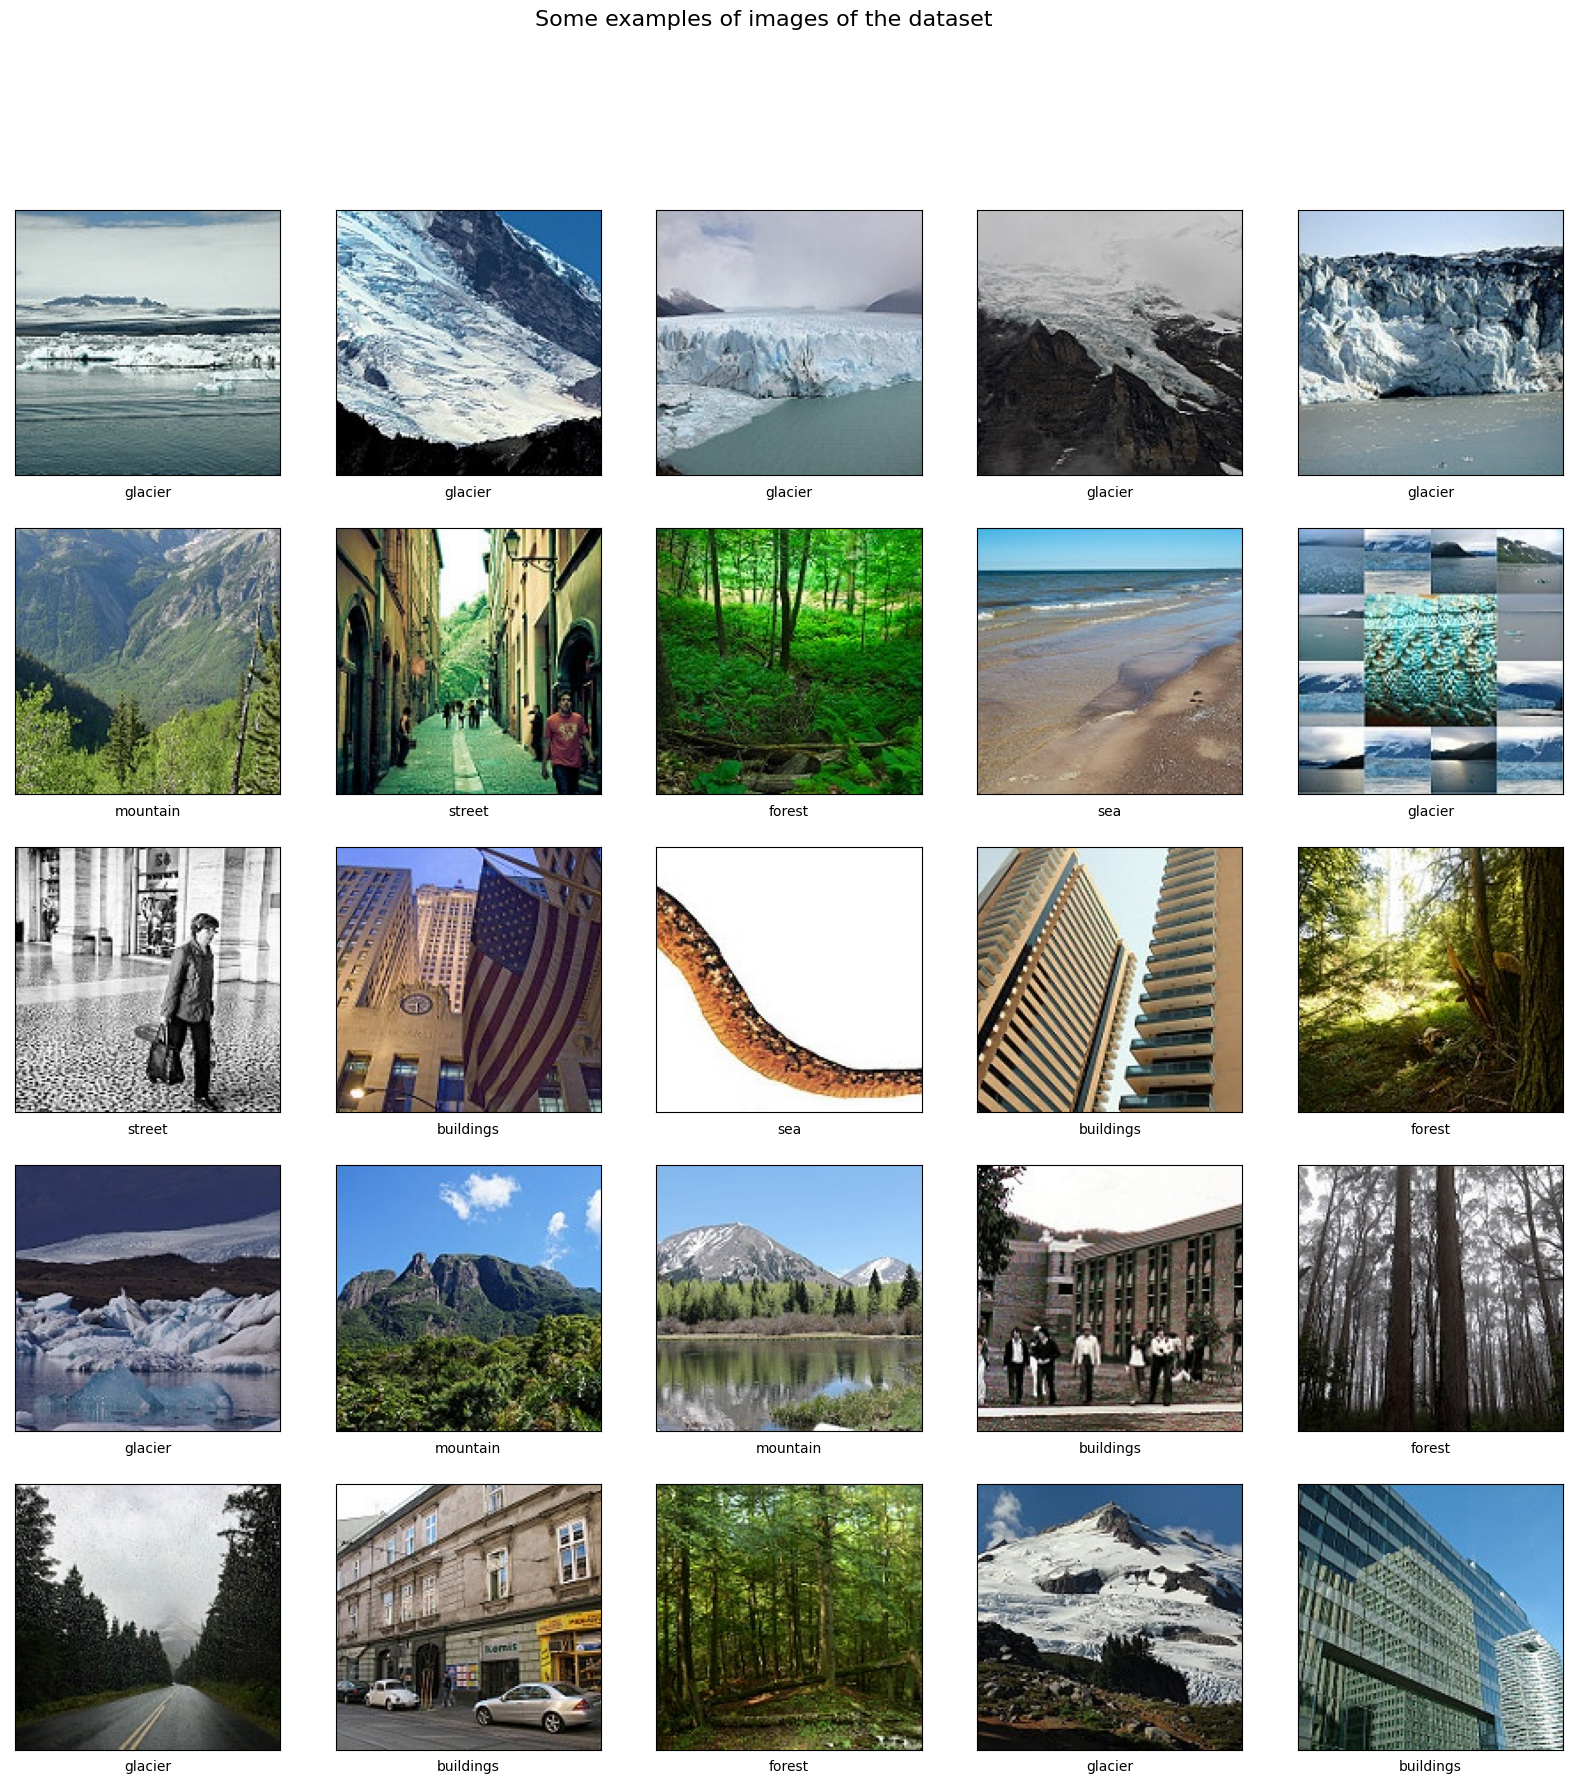

In [24]:
def display_examples(class_names, images, labels):

    figsize = (20,20)
    fig = plt. figure(figsize=figsize)
    fig. suptitle("Some examples of images of the dataset", fontsize=16) 
    for i in range(25):
        plt. subplot (5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].astype(np.uint8))#, cmap=pLt.cm.binary)
        plt. xlabel(class_names[labels[i]])
    plt. show()
display_examples(class_names, train_images,train_labels)

# Model Creation

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Epoch 1/5
19/19 [==============================] - 34s 2s/step - loss: 171.1130 - accuracy: 0.2362 - val_loss: 1.6956 - val_accuracy: 0.3283
Epoch 2/5
19/19 [==============================] - 29s 2s/step - loss: 1.5460 - accuracy: 0.4162 - val_loss: 1.6164 - val_accuracy: 0.3317
Epoch 3/5
19/19 [==============================] - 29s 2s/step - loss: 1.1649 - accuracy: 0.5746 - val_loss: 1.7746 - val_accuracy: 0.3450
Epoch 4/5
19/19 [==============================] - 31s 2s/step - loss: 0.7403 - accuracy: 0.7642 - val_loss: 2.0236 - val_accuracy: 0.3517
Epoch 5/5
19/19 [==============================] - 29s 2s/step - loss: 0.4372 - accuracy: 0.8746 - val_loss: 2.4381 - val_accuracy: 0.3300


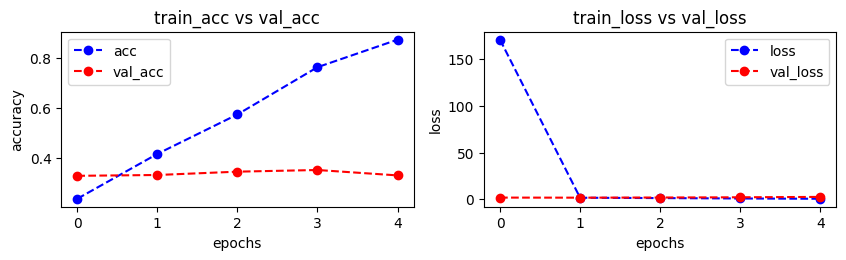

In [30]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10, 5))

    # Plot accuracy
    plt.subplot(221)
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'], 'bo--', label="acc")
    elif 'acc' in history.history:
        plt.plot(history.history['acc'], 'bo--', label="acc")
    else:
        raise KeyError("Neither 'accuracy' nor 'acc' found in history.")

    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], 'ro--', label="val_acc")
    elif 'val_acc' in history.history:
        plt.plot(history.history['val_acc'], 'ro--', label="val_acc")
    else:
        raise KeyError("Neither 'val_accuracy' nor 'val_acc' found in history.")

    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label="loss")
    plt.plot(history.history['val_loss'], 'ro--', label="val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

# Call the plot_accuracy_loss function
plot_accuracy_loss(history)


439/439 [==============================] - 42s 96ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


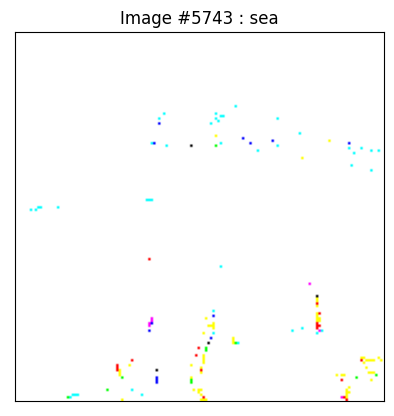

In [31]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)


In [33]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image 
from keras.applications.vgg16 import preprocess_input 
from keras.models import Model


model = VGG16(weights= 'imagenet', include_top=False)
model = Model(inputs=model. inputs, outputs=model.layers[-5].output)
train_features = model.predict(train_images)
test_features = model.predict(test_images)

439/439 [==============================] - 929s 2s/step


In [35]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer


x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [36]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 9, 9, 512)]       0         
                                                                 
 block5_conv1 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv2 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv3 (Conv2D)       multiple                  2359808   
                                                                 
 block5_pool (MaxPooling2D)  multiple                  0         
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          294976    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0   

In [38]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=4, validation_split = 0.2)

Epoch 1/4
19/19 [==============================] - 68s 3s/step - loss: 3.5398 - accuracy: 0.1758 - val_loss: 1.7919 - val_accuracy: 0.1683
Epoch 2/4
19/19 [==============================] - 67s 4s/step - loss: 1.7921 - accuracy: 0.1696 - val_loss: 1.7920 - val_accuracy: 0.1683
Epoch 3/4
19/19 [==============================] - 66s 3s/step - loss: 1.9269 - accuracy: 0.1737 - val_loss: 1.7922 - val_accuracy: 0.1717
Epoch 4/4
19/19 [==============================] - 67s 4s/step - loss: 1.7904 - accuracy: 0.1875 - val_loss: 1.7924 - val_accuracy: 0.1717


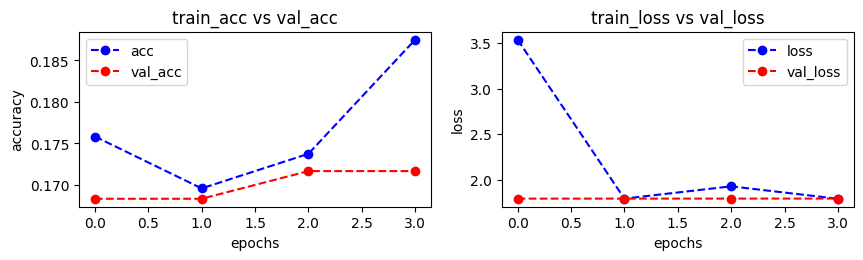

In [39]:
plot_accuracy_loss(history)

In [40]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

439/439 [==============================] - 79s 179ms/step
Accuracy : 0.17129827561636027
